This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

In [16]:
import wradlib as wrl
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import metpy
import requests
import matplotlib.pyplot as pl
import matplotlib.patheffects as pe
import matplotlib.colors
from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from metpy.plots import ctables
#from osgeo import osr


from datetime import timedelta, datetime

import urllib
import io
import glob

try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()

from html.parser import HTMLParser
try:
    import urlparse
    from urllib import urlencode
except: # For Python 3
    import urllib.parse as urlparse
    from urllib.parse import urlencode

def ceil_dt(dt, delta):
    return dt + (datetime.min - dt) % delta
    
now = datetime.utcnow()-timedelta(hours=0, minutes=15)
timenow_iso = now.strftime("%Y-%m-%dT%H%M00")

print(timenow_iso)
print(ceil_dt(now, timedelta(minutes=30)))

#f = glob.glob('/home/lmathias/wradlib/wradlib-notebooks/notebooks/OPERA/20200803123000_MAXIMUM_REFLECTIVITY.HDF5')
#f=f[-1]

url = "https://partner-api.meteofrance.fr/partner/radar/europe/odyssey/1.1/realtime/composite/MAXIMUM_REFLECTIVITY"
#params = {'time': timenow_iso+'Z','apikey':'eyJ4NXQiOiJZV0kxTTJZNE1qWTNOemsyTkRZeU5XTTRPV014TXpjek1UVmhNbU14T1RSa09ETXlOVEE0Tnc9PSIsImtpZCI6ImdhdGV3YXlfY2VydGlmaWNhdGVfYWxpYXMiLCJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiJ9.eyJzdWIiOiJsdWNhLm1hdGhpYXNAY2FyYm9uLnN1cGVyIiwiYXBwbGljYXRpb24iOnsib3duZXIiOiJsdWNhLm1hdGhpYXMiLCJ0aWVyUXVvdGFUeXBlIjpudWxsLCJ0aWVyIjoiVW5saW1pdGVkIiwibmFtZSI6Ik9QRVJBIiwiaWQiOjg3OSwidXVpZCI6Ijc4YTJiOGJhLTllMjctNDZhNy1iZjE2LTIyNmZkNDhmYjE0ZCJ9LCJpc3MiOiJodHRwczpcL1wvcG9ydGFpbC1hcGkubWV0ZW9mcmFuY2UuZnI6NDQzXC9vYXV0aDJcL3Rva2VuIiwidGllckluZm8iOnsiNTBQZXJNaW4iOnsidGllclF1b3RhVHlwZSI6InJlcXVlc3RDb3VudCIsImdyYXBoUUxNYXhDb21wbGV4aXR5IjowLCJncmFwaFFMTWF4RGVwdGgiOjAsInN0b3BPblF1b3RhUmVhY2giOnRydWUsInNwaWtlQXJyZXN0TGltaXQiOjAsInNwaWtlQXJyZXN0VW5pdCI6InNlYyJ9fSwia2V5dHlwZSI6IlBST0RVQ1RJT04iLCJzdWJzY3JpYmVkQVBJcyI6W3sic3Vic2NyaWJlclRlbmFudERvbWFpbiI6ImNhcmJvbi5zdXBlciIsIm5hbWUiOiJSYWRhckV1bWV0bmV0IiwiY29udGV4dCI6IlwvcGFydG5lclwvcmFkYXJcL2V1cm9wZVwvb2R5c3NleVwvMS4xIiwicHVibGlzaGVyIjoiTUVURU8uRlJcL21hcnRpbmwiLCJ2ZXJzaW9uIjoiMS4xIiwic3Vic2NyaXB0aW9uVGllciI6IjUwUGVyTWluIn1dLCJleHAiOjE3NDM3NzU3NjgsImlhdCI6MTY0OTE2Nzc2OCwianRpIjoiZDI5NGE2MDAtMmQ3Zi00ZTZlLWI1YWMtMmQzNTY5MjU5MmE0In0=.aT7jM5QdhebQWiuy2JKqPTnDHTbgXgTKruY9kh2f4wokyyZsphHlqLKww3Y3qGiO5Xw69P3iZGepuFEH2erEgYdzNmDdsd7kbO6BkinFNTaHn67rYfTAvujf0rktdgwOWpz_B6YWsvPk7G9x9cmg4ET81mNn3us1cpAB9AZ-2GJEIHvKS3p4sapXAPBOZ7XDXHa9rmKoCd399ee5SySp6EwQBfuDy604FNiKBOUmNehqeAl_3Ir9QBLCZpJwdsLG3E3awgDiNBM0bX7nTuYYMdmvT4IK5ymhjE0_TyROYYJ4kGOqyP7vEjca1mH5yrJmCfNGLoDkWSNhDpHPg-NNTw==', 'format': 'HDF5'}
params = {'time': '2022-04-04T180000Z?format=HDF5','apikey':'eyJ4NXQiOiJZV0kxTTJZNE1qWTNOemsyTkRZeU5XTTRPV014TXpjek1UVmhNbU14T1RSa09ETXlOVEE0Tnc9PSIsImtpZCI6ImdhdGV3YXlfY2VydGlmaWNhdGVfYWxpYXMiLCJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiJ9.eyJzdWIiOiJsdWNhLm1hdGhpYXNAY2FyYm9uLnN1cGVyIiwiYXBwbGljYXRpb24iOnsib3duZXIiOiJsdWNhLm1hdGhpYXMiLCJ0aWVyUXVvdGFUeXBlIjpudWxsLCJ0aWVyIjoiVW5saW1pdGVkIiwibmFtZSI6Ik9QRVJBIiwiaWQiOjg3OSwidXVpZCI6Ijc4YTJiOGJhLTllMjctNDZhNy1iZjE2LTIyNmZkNDhmYjE0ZCJ9LCJpc3MiOiJodHRwczpcL1wvcG9ydGFpbC1hcGkubWV0ZW9mcmFuY2UuZnI6NDQzXC9vYXV0aDJcL3Rva2VuIiwidGllckluZm8iOnsiNTBQZXJNaW4iOnsidGllclF1b3RhVHlwZSI6InJlcXVlc3RDb3VudCIsImdyYXBoUUxNYXhDb21wbGV4aXR5IjowLCJncmFwaFFMTWF4RGVwdGgiOjAsInN0b3BPblF1b3RhUmVhY2giOnRydWUsInNwaWtlQXJyZXN0TGltaXQiOjAsInNwaWtlQXJyZXN0VW5pdCI6InNlYyJ9fSwia2V5dHlwZSI6IlBST0RVQ1RJT04iLCJzdWJzY3JpYmVkQVBJcyI6W3sic3Vic2NyaWJlclRlbmFudERvbWFpbiI6ImNhcmJvbi5zdXBlciIsIm5hbWUiOiJSYWRhckV1bWV0bmV0IiwiY29udGV4dCI6IlwvcGFydG5lclwvcmFkYXJcL2V1cm9wZVwvb2R5c3NleVwvMS4xIiwicHVibGlzaGVyIjoiTUVURU8uRlJcL21hcnRpbmwiLCJ2ZXJzaW9uIjoiMS4xIiwic3Vic2NyaXB0aW9uVGllciI6IjUwUGVyTWluIn1dLCJleHAiOjE3NDM3NzU3NjgsImlhdCI6MTY0OTE2Nzc2OCwianRpIjoiZDI5NGE2MDAtMmQ3Zi00ZTZlLWI1YWMtMmQzNTY5MjU5MmE0In0=.aT7jM5QdhebQWiuy2JKqPTnDHTbgXgTKruY9kh2f4wokyyZsphHlqLKww3Y3qGiO5Xw69P3iZGepuFEH2erEgYdzNmDdsd7kbO6BkinFNTaHn67rYfTAvujf0rktdgwOWpz_B6YWsvPk7G9x9cmg4ET81mNn3us1cpAB9AZ-2GJEIHvKS3p4sapXAPBOZ7XDXHa9rmKoCd399ee5SySp6EwQBfuDy604FNiKBOUmNehqeAl_3Ir9QBLCZpJwdsLG3E3awgDiNBM0bX7nTuYYMdmvT4IK5ymhjE0_TyROYYJ4kGOqyP7vEjca1mH5yrJmCfNGLoDkWSNhDpHPg-NNTw=='}

url_parts = list(urlparse.urlparse(url))
query = dict(urlparse.parse_qsl(url_parts[4]))
query.update(params)

url_parts[4] = urlencode(query).replace("%3A", ":")
url = urlparse.urlunparse(url_parts)


print(url)

f = requests.get(url)

open('/home/lmathias/wradlib/wradlib-notebooks/notebooks/OPERA/maxdbz_latest.hdf5', 'wb').write(f.content)

f = glob.glob('/home/lmathias/wradlib/wradlib-notebooks/notebooks/OPERA/maxdbz_latest.hdf5')
f=f[-1]
print(f)

vol = wrl.io.hdf.read_opera_hdf5(f)

#print(vol)
import dateutil.parser
date = vol['dataset1/what']['enddate'].decode("utf-8")
print(date)
time = vol['dataset1/what']['endtime'].decode("utf-8")
print(time)
time = date+time
print(time)
time2 = datetime.strptime(time, "%Y%m%d%H%M%S")-timedelta(hours=0, minutes=5)
print(time2)

2022-04-05T143000
2022-04-05 15:00:00
https://partner-api.meteofrance.fr/partner/radar/europe/odyssey/1.1/realtime/composite/MAXIMUM_REFLECTIVITY?time=2022-04-04T180000Z%3Fformat%3DHDF5&apikey=eyJ4NXQiOiJZV0kxTTJZNE1qWTNOemsyTkRZeU5XTTRPV014TXpjek1UVmhNbU14T1RSa09ETXlOVEE0Tnc9PSIsImtpZCI6ImdhdGV3YXlfY2VydGlmaWNhdGVfYWxpYXMiLCJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiJ9.eyJzdWIiOiJsdWNhLm1hdGhpYXNAY2FyYm9uLnN1cGVyIiwiYXBwbGljYXRpb24iOnsib3duZXIiOiJsdWNhLm1hdGhpYXMiLCJ0aWVyUXVvdGFUeXBlIjpudWxsLCJ0aWVyIjoiVW5saW1pdGVkIiwibmFtZSI6Ik9QRVJBIiwiaWQiOjg3OSwidXVpZCI6Ijc4YTJiOGJhLTllMjctNDZhNy1iZjE2LTIyNmZkNDhmYjE0ZCJ9LCJpc3MiOiJodHRwczpcL1wvcG9ydGFpbC1hcGkubWV0ZW9mcmFuY2UuZnI6NDQzXC9vYXV0aDJcL3Rva2VuIiwidGllckluZm8iOnsiNTBQZXJNaW4iOnsidGllclF1b3RhVHlwZSI6InJlcXVlc3RDb3VudCIsImdyYXBoUUxNYXhDb21wbGV4aXR5IjowLCJncmFwaFFMTWF4RGVwdGgiOjAsInN0b3BPblF1b3RhUmVhY2giOnRydWUsInNwaWtlQXJyZXN0TGltaXQiOjAsInNwaWtlQXJyZXN0VW5pdCI6InNlYyJ9fSwia2V5dHlwZSI6IlBST0RVQ1RJT04iLCJzdWJzY3JpYmVkQVBJcyI6W3sic3Vic2NyaWJlclRlbmFudE

OSError: Unable to open file (file signature not found)

In [21]:
import requests
from requests.structures import CaseInsensitiveDict

url = "https://partner-api.meteofrance.fr/partner/radar/europe/odyssey/1.1/realtime/composite/RAINFALL_RATE/"+timenow_iso+"Z?format=HDF5"

headers = CaseInsensitiveDict()
headers["accept"] = "application/x-hdf"
headers["apikey"] = "eyJ4NXQiOiJZV0kxTTJZNE1qWTNOemsyTkRZeU5XTTRPV014TXpjek1UVmhNbU14T1RSa09ETXlOVEE0Tnc9PSIsImtpZCI6ImdhdGV3YXlfY2VydGlmaWNhdGVfYWxpYXMiLCJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiJ9.eyJzdWIiOiJsdWNhLm1hdGhpYXNAY2FyYm9uLnN1cGVyIiwiYXBwbGljYXRpb24iOnsib3duZXIiOiJsdWNhLm1hdGhpYXMiLCJ0aWVyUXVvdGFUeXBlIjpudWxsLCJ0aWVyIjoiVW5saW1pdGVkIiwibmFtZSI6Ik9QRVJBIiwiaWQiOjg3OSwidXVpZCI6Ijc4YTJiOGJhLTllMjctNDZhNy1iZjE2LTIyNmZkNDhmYjE0ZCJ9LCJpc3MiOiJodHRwczpcL1wvcG9ydGFpbC1hcGkubWV0ZW9mcmFuY2UuZnI6NDQzXC9vYXV0aDJcL3Rva2VuIiwidGllckluZm8iOnsiNTBQZXJNaW4iOnsidGllclF1b3RhVHlwZSI6InJlcXVlc3RDb3VudCIsImdyYXBoUUxNYXhDb21wbGV4aXR5IjowLCJncmFwaFFMTWF4RGVwdGgiOjAsInN0b3BPblF1b3RhUmVhY2giOnRydWUsInNwaWtlQXJyZXN0TGltaXQiOjAsInNwaWtlQXJyZXN0VW5pdCI6InNlYyJ9fSwia2V5dHlwZSI6IlBST0RVQ1RJT04iLCJzdWJzY3JpYmVkQVBJcyI6W3sic3Vic2NyaWJlclRlbmFudERvbWFpbiI6ImNhcmJvbi5zdXBlciIsIm5hbWUiOiJSYWRhckV1bWV0bmV0IiwiY29udGV4dCI6IlwvcGFydG5lclwvcmFkYXJcL2V1cm9wZVwvb2R5c3NleVwvMS4xIiwicHVibGlzaGVyIjoiTUVURU8uRlJcL21hcnRpbmwiLCJ2ZXJzaW9uIjoiMS4xIiwic3Vic2NyaXB0aW9uVGllciI6IjUwUGVyTWluIn1dLCJleHAiOjE3NDM3NzU3NjgsImlhdCI6MTY0OTE2Nzc2OCwianRpIjoiZDI5NGE2MDAtMmQ3Zi00ZTZlLWI1YWMtMmQzNTY5MjU5MmE0In0=.aT7jM5QdhebQWiuy2JKqPTnDHTbgXgTKruY9kh2f4wokyyZsphHlqLKww3Y3qGiO5Xw69P3iZGepuFEH2erEgYdzNmDdsd7kbO6BkinFNTaHn67rYfTAvujf0rktdgwOWpz_B6YWsvPk7G9x9cmg4ET81mNn3us1cpAB9AZ-2GJEIHvKS3p4sapXAPBOZ7XDXHa9rmKoCd399ee5SySp6EwQBfuDy604FNiKBOUmNehqeAl_3Ir9QBLCZpJwdsLG3E3awgDiNBM0bX7nTuYYMdmvT4IK5ymhjE0_TyROYYJ4kGOqyP7vEjca1mH5yrJmCfNGLoDkWSNhDpHPg-NNTw=="


resp = requests.get(url, headers=headers)

print(resp.status_code)


open('/home/lmathias/wradlib/wradlib-notebooks/notebooks/OPERA/sfcrr_latest.hdf5', 'wb').write(resp.content)

resp = glob.glob('/home/lmathias/wradlib/wradlib-notebooks/notebooks/OPERA/sfcrr_latest.hdf5')
resp=resp[-1]
print(resp)

vol = wrl.io.hdf.read_opera_hdf5(f)

#print(vol)
import dateutil.parser
date = vol['dataset1/what']['enddate'].decode("utf-8")
print(date)
time = vol['dataset1/what']['endtime'].decode("utf-8")
print(time)
time = date+time
print(time)
time2 = datetime.strptime(time, "%Y%m%d%H%M%S")-timedelta(hours=0, minutes=5)
print(time2)

200
/home/lmathias/wradlib/wradlib-notebooks/notebooks/OPERA/sfcrr_latest.hdf5
20220405
143500
20220405143500
2022-04-05 14:30:00


In [22]:
from pyproj import Proj,transform
import osr
import numpy.ma as ma


myProj = Proj("+proj=laea +lat_0=55.0 +lon_0=10.0 +x_0=1950000.0 +y_0=-2100000.0 +units=m +ellps=WGS84")
projdef = "+proj=laea +lat_0=55.0 +lon_0=10.0 +x_0=1950000.0 +y_0=-2100000.0 +units=m +ellps=WGS84"
proj_stereo = wrl.georef.proj4_to_osr(projdef)
print(proj_stereo)

 
opera_proj = Proj(projparams=projdef)  
wgs_proj = Proj(init='EPSG:4326')  # WGS84

LL_lon = vol['where']['LL_lon']
UL_lon = vol['where']['UL_lon']
UR_lon = vol['where']['UR_lon']
LR_lon = vol['where']['LR_lon']
LL_lat = vol['where']['LL_lat']
UL_lat = vol['where']['UL_lat']
UR_lat = vol['where']['UR_lat']
LR_lat = vol['where']['LR_lat']

x0, y0 = transform(wgs_proj, opera_proj, UL_lon, UL_lat)
x1, y1 = transform(wgs_proj, opera_proj, LR_lon, LR_lat)

xscale = 2000.0 
yscale = 2000.0

x = np.linspace(x0, x1, 1900)
y = np.linspace(y0, y1, 2200)
xv, yv = np.meshgrid(x, y)

lon, lat = transform(opera_proj, wgs_proj, xv, yv)

def plot_borders2(ax):
    filename = wrl.util.get_wradlib_data_file('geo/gadm36_LUX_0.shp')
    filename2 = wrl.util.get_wradlib_data_file('geo/gadm36_ITA_0.shp')
    filename3 = wrl.util.get_wradlib_data_file('geo/gadm36_BEL_0.shp')
    filename4 = wrl.util.get_wradlib_data_file('geo/gadm36_FRA_0.shp')
    filename5 = wrl.util.get_wradlib_data_file('geo/gadm36_DEU_0.shp')
    filename6 = wrl.util.get_wradlib_data_file('geo/gadm36_GBR_0.shp')
    filename7 = wrl.util.get_wradlib_data_file('geo/gadm36_NLD_0.shp')
    filename8 = wrl.util.get_wradlib_data_file('geo/gadm36_ESP_0.shp')
    filename9 = wrl.util.get_wradlib_data_file('geo/gadm36_CZE_0.shp')
    filename10 = wrl.util.get_wradlib_data_file('geo/gadm36_CHE_0.shp')
    filename11 = wrl.util.get_wradlib_data_file('geo/gadm36_DNK_0.shp')
    filename12 = wrl.util.get_wradlib_data_file('geo/gadm36_AUT_0.shp')
    filename13 = wrl.util.get_wradlib_data_file('geo/gadm36_POL_0.shp')
    filename14 = wrl.util.get_wradlib_data_file('geo/gadm36_SVN_0.shp')
    filename15 = wrl.util.get_wradlib_data_file('geo/gadm36_HRV_0.shp')
    dataset, inLayer = wrl.io.open_vector(filename)
    dataset2, inLayer2 = wrl.io.open_vector(filename2)
    dataset3, inLayer3 = wrl.io.open_vector(filename3)
    dataset4, inLayer4 = wrl.io.open_vector(filename4)
    dataset5, inLayer5 = wrl.io.open_vector(filename5)
    dataset6, inLayer6 = wrl.io.open_vector(filename6)
    dataset7, inLayer7 = wrl.io.open_vector(filename7)
    dataset8, inLayer8 = wrl.io.open_vector(filename8)
    dataset9, inLayer9 = wrl.io.open_vector(filename9)
    dataset10, inLayer10 = wrl.io.open_vector(filename10)
    dataset11, inLayer11 = wrl.io.open_vector(filename11)
    dataset12, inLayer12 = wrl.io.open_vector(filename12)
    dataset13, inLayer13 = wrl.io.open_vector(filename13)
    dataset14, inLayer14 = wrl.io.open_vector(filename14)
    dataset15, inLayer15 = wrl.io.open_vector(filename15)
    borders, keys = wrl.georef.get_vector_coordinates(inLayer)
    borders2, keys2 = wrl.georef.get_vector_coordinates(inLayer2)
    borders3, keys3 = wrl.georef.get_vector_coordinates(inLayer3)
    borders4, keys4 = wrl.georef.get_vector_coordinates(inLayer4)
    borders5, keys5 = wrl.georef.get_vector_coordinates(inLayer5)
    borders6, keys6 = wrl.georef.get_vector_coordinates(inLayer6)
    borders7, keys7 = wrl.georef.get_vector_coordinates(inLayer7)
    borders8, keys8 = wrl.georef.get_vector_coordinates(inLayer8)
    borders9, keys9 = wrl.georef.get_vector_coordinates(inLayer9)
    borders10, keys10 = wrl.georef.get_vector_coordinates(inLayer10)
    borders11, keys11 = wrl.georef.get_vector_coordinates(inLayer11)
    borders12, keys12 = wrl.georef.get_vector_coordinates(inLayer12)
    borders13, keys13 = wrl.georef.get_vector_coordinates(inLayer13)
    borders14, keys14 = wrl.georef.get_vector_coordinates(inLayer14)
    borders15, keys15 = wrl.georef.get_vector_coordinates(inLayer15)
    wrl.vis.add_lines(ax, borders, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders2, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders3, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders4, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders5, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders6, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders7, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders8, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders9, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders10, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders11, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders12, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders13, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders14, color='black', lw=1, zorder=4)
    wrl.vis.add_lines(ax, borders15, color='black', lw=1, zorder=4)



cmap = ctables.colortables.get_colortable('NWSStormClearReflectivity')

newcmap = ListedColormap(cmap(np.linspace(0.34, 0.92, 24)))

maxdbz = vol['dataset1/data1/data']

maxdbz = ma.masked_where(maxdbz < 10, maxdbz)

#maxdbz_int = griddata(lon,lat, maxdbz, method='linear')

fig = pl.figure(figsize=(15,11))
ax = pl.subplot(111)
pm = ax.pcolormesh(lon, lat, maxdbz, cmap=newcmap, vmin=10, vmax=70)
cb = pl.colorbar(pm, ax=ax, shrink=0.9, ticks=[0,10,20,30,40,50,60,70],orientation='vertical')
cb.set_label("dBZ",fontsize=16)
cb.ax.tick_params(labelsize=14)
pl.xlabel("Longitude ",fontsize=16) 
pl.ylabel("Latitude",fontsize=16)
pl.title(time2.strftime("%d.%m.%Y %H:%M UTC"),fontsize=22)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.grid(linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
pl.xlim(-5, 16)
pl.ylim(42, 55)
plot_borders2(ax)
t = pl.gcf().text(0.135, 0.84, 'Product: Maximum Reflectivity (OPERA)\nData: EUMETNET', fontsize=10)
t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))

base_filename='opera_maxdbz_'
suffix='.png'
my_file = base_filename+time2.strftime("%Y%m%d%H%M")+suffix
print(my_file)
pl.savefig(my_file, bbox_inches='tight', dpi=300)

ImportError: libtbb.so.2: cannot open shared object file: No such file or directory

In [3]:
url = "https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE"
params = {'time': timenow_iso+'Z','token':'__0FJkG68Nupy4ioUVcbSFMLTpJbsX7zixwHzoQrAi688__', 'format': 'HDF5'}

url_parts = list(urlparse.urlparse(url))
query = dict(urlparse.parse_qsl(url_parts[4]))
query.update(params)

url_parts[4] = urlencode(query).replace("%3A", ":")
url = urlparse.urlunparse(url_parts)


print(url)

f = requests.get(url)

open('/home/lmathias/wradlib/wradlib-notebooks/notebooks/OPERA/surfacerr_latest.hdf5', 'wb').write(f.content)

f = glob.glob('/home/lmathias/wradlib/wradlib-notebooks/notebooks/OPERA/surfacerr_latest.hdf5')
f=f[-1]
print(f)

vol2 = wrl.io.hdf.read_opera_hdf5(f)

print(vol2)
import dateutil.parser
date = vol2['dataset1/what']['enddate'].decode("utf-8")
print(date)
time = vol2['dataset1/what']['endtime'].decode("utf-8")
print(time)
time = date+time
print(time)
time2 = datetime.strptime(time, "%Y%m%d%H%M%S")-timedelta(hours=0, minutes=5)
print(time2)
#time = time-timedelta(hours=0, minutes=5)

https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-08-11T09:30:00Z&token=__0FJkG68Nupy4ioUVcbSFMLTpJbsX7zixwHzoQrAi688__&format=HDF5
/home/lmathias/wradlib/wradlib-notebooks/notebooks/OPERA/surfacerr_latest.hdf5
{'dataset1/data1/data': array([[-9999000., -9999000., -9999000., ..., -9999000., -9999000.,
        -9999000.],
       [-9999000., -9999000., -9999000., ..., -9999000., -9999000.,
        -9999000.],
       [-9999000., -9999000., -9999000., ..., -9999000., -9999000.,
        -9999000.],
       ...,
       [-9999000., -9999000., -9999000., ..., -9999000., -9999000.,
        -9999000.],
       [-9999000., -9999000., -9999000., ..., -9999000., -9999000.,
        -9999000.],
       [-9999000., -9999000., -9999000., ..., -9999000., -9999000.,
        -9999000.]]), 'dataset1/what': {'enddate': b'20200811', 'endtime': b'093500', 'gain': 1.0, 'nodata': -9999000.0, 'offset': 0.0, 'product': b'COMP', 'quantity': b'RATE', 'startdate': b'20200811', 'startti

opera_sfcrr_202008081330.jpeg


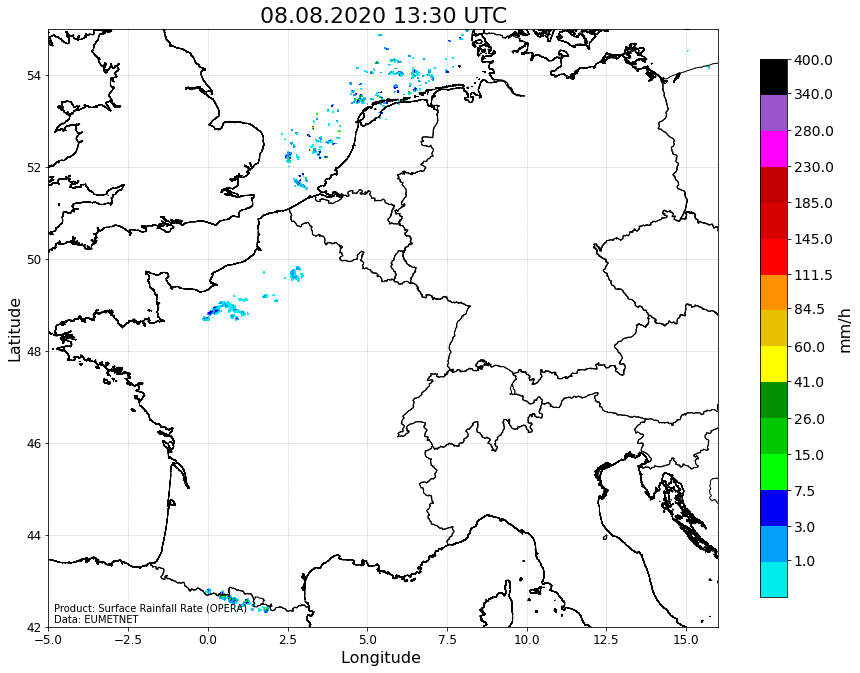

In [7]:
import matplotlib.colors as mcolors


cmap2 = ctables.colortables.get_colortable('NWSReflectivity')

sfcrr = vol2['dataset1/data1/data']
#sfcdbz = wrl.zr.r_to_z(sfcrr, a=200.0, b=1.6)
#sfcdbz = ma.masked_where(sfcdbz < 0, sfcdbz)
sfcrr = ma.masked_where(sfcrr < 0.5, sfcrr)

fig = pl.figure(figsize=(15,11))
ax = pl.subplot(111)
pm = ax.pcolormesh(lon, lat, sfcrr, cmap=cmap2, norm=mcolors.PowerNorm(gamma=0.4), vmin=0.5, vmax=400)
cb = pl.colorbar(pm, ax=ax, shrink=0.9, ticks=[1,3,7.5,15,26,41,60,84.5,111.5,145,185,230,280,340,400], orientation='vertical')
cb.set_label("mm/h",fontsize=16)
cb.ax.tick_params(labelsize=14)
pl.xlabel("Longitude ",fontsize=16) 
pl.ylabel("Latitude",fontsize=16)
pl.title(time2.strftime("%d.%m.%Y %H:%M UTC"),fontsize=22)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.grid(linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
pl.xlim(-5, 16)
pl.ylim(42, 55)
plot_borders2(ax)
t = pl.gcf().text(0.135, 0.84, 'Product: Surface Rainfall Rate (OPERA)\nData: EUMETNET', fontsize=10)
t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))

base_filename='opera_sfcrr_'
suffix='.png'
my_file = base_filename+time2.strftime("%Y%m%d%H%M")+suffix
print(my_file)
pl.savefig(my_file, bbox_inches='tight', dpi=300)